In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


##Instantiating a small convnet

In [3]:
from keras import layers
from keras import models
model = models.Sequential()
#convnets
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Using TensorFlow backend.


##Training the convnets on mnist dataset

In [5]:
from keras.datasets import mnist
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)

Epoch 1/5
60000/60000 [==============================] - 9s 144us/step - loss: 0.1701 - accuracy: 0.9465
Epoch 2/5
60000/60000 [==============================] - 8s 132us/step - loss: 0.0477 - accuracy: 0.9852
Epoch 3/5
60000/60000 [==============================] - 8s 131us/step - loss: 0.0326 - accuracy: 0.9903
Epoch 4/5
60000/60000 [==============================] - 8s 131us/step - loss: 0.0236 - accuracy: 0.9924
Epoch 5/5
10000/10000 [==============================] - 1s 110us/step


In [6]:
test_acc

0.9930999875068665

# Training Convnets on small dataset

## Segregate into training, validation, and test directories

In [2]:
train_dir = '/content/drive/My Drive/base_dir/train_dir'
validation_dir = '/content/drive/My Drive/base_dir/val_dir'
test_dir = '/content/drive/My Drive/base_dir/test_dir'

##Instantiating a small convnet for dogs vs. cats classification

In [8]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

##Using ImageDataGenerator to read images from directories

In [10]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size = 20,
class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 2048 images belonging to 2 classes.
Found 1025 images belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


##Fitting the model using a batch generator

In [12]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=20,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/20
100/100 [==============================] - 706s 7s/step - loss: 0.6921 - acc: 0.5332 - val_loss: 0.6985 - val_acc: 0.5800
Epoch 2/20
100/100 [==============================] - 15s 149ms/step - loss: 0.6532 - acc: 0.6212 - val_loss: 0.6487 - val_acc: 0.6325
Epoch 3/20
100/100 [==============================] - 14s 143ms/step - loss: 0.6051 - acc: 0.6695 - val_loss: 0.5801 - val_acc: 0.6426
Epoch 4/20
100/100 [==============================] - 14s 144ms/step - loss: 0.5579 - acc: 0.7067 - val_loss: 0.9123 - val_acc: 0.6142
Epoch 5/20
100/100 [==============================] - 14s 138ms/step - loss: 0.5338 - acc: 0.7349 - val_loss: 0.5388 - val_acc: 0.6985
Epoch 6/20
100/100 [==============================] - 14s 139ms/step - loss: 0.4921 - acc: 0.7591 - val_loss: 0.7077 - val_acc: 0.7015
Epoch 7/20
100/100 [==============================] - 14s 137ms/step - loss: 0.4736 - acc: 0.7666 - val_loss: 0.6292 - val_acc: 0.7178
Epoch 8/20
100/100 [==============================] - 14s

In [13]:
model.save('cats_and_dogs_small_1.h5')

##Displaying curves of loss and accuracy during training

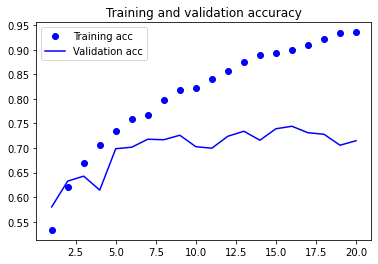

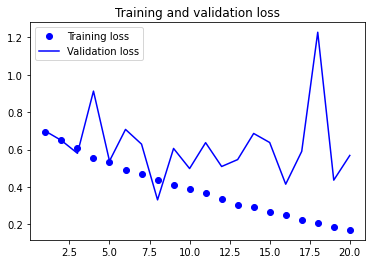

In [14]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

##Data Augumentation

In [ ]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

##Displaying some randomly augmented training images

In [17]:
import os
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for
fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
plt.show()

NameError: ignored

##Training the convnet using data-augmentation generators with added dropouts

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [20]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

Found 2048 images belonging to 2 classes.
Found 1025 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 41s 407ms/step - loss: 0.6890 - acc: 0.5412 - val_loss: 0.6861 - val_acc: 0.5309
Epoch 2/30
100/100 [==============================] - 37s 368ms/step - loss: 0.6722 - acc: 0.5844 - val_loss: 0.5762 - val_acc: 0.6125
Epoch 3/30
100/100 [==============================] - 38s 378ms/step - loss: 0.6578 - acc: 0.6084 - val_loss: 0.6749 - val_acc: 0.6265
Epoch 4/30
100/100 [==============================] - 37s 372ms/step - loss: 0.6395 - acc: 0.6322 - val_loss: 0.6313 - val_acc: 0.6567
Epoch 5/30
100/100 [==============================] - 37s 371ms/step - loss: 0.6224 - acc: 0.6597 - val_loss: 0.5606 - val_acc: 0.6597
Epoch 6/30
100/100 [==============================] - 37s 365ms/step - loss: 0.6037 - acc: 0.6797 - val_loss: 0.5426 - val_acc: 0.6834
Epoch 7/30
100/100 [==============================] - 36s 364ms/step - loss: 0.5998 - acc: 0.6703 - val_lo

In [ ]:
model.save('cats_and_dogs_small_2.h5')

# Transfer Learning: Using a pretrained convnet

##FAST FEATURE EXTRACTION WITHOUT DATA AUGMENTATION
Running the convolutional base over your dataset, recording its output to a
Numpy array on disk, and then using this data as input to a standalone, densely
connected classifier


##Instantiating the VGG16 convolutional base

In [3]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

Using TensorFlow backend.


58892288/58889256 [==============================] - 1s 0us/step


##Extracting features using the pretrained convolutional base

In [4]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20
def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
  directory,
  target_size=(150, 150),
  batch_size=batch_size,
  class_mode='binary')
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
    return features, labels
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2048 images belonging to 2 classes.
Found 1025 images belonging to 2 classes.
Found 1039 images belonging to 2 classes.


Flattning the data to feeed into densly connected classifier

In [5]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

##Defining and training the densely connected classifier

In [6]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(train_features, train_labels,
epochs=20,
batch_size=20,
validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/20
2000/2000 [==============================] - 1s 335us/step - loss: 0.6923 - acc: 0.9955 - val_loss: 0.6873 - val_acc: 0.9940
Epoch 2/20
2000/2000 [==============================] - 0s 229us/step - loss: 0.6849 - acc: 0.9965 - val_loss: 0.6825 - val_acc: 0.9900
Epoch 3/20
2000/2000 [==============================] - 0s 229us/step - loss: 0.6773 - acc: 0.9980 - val_loss: 0.6770 - val_acc: 0.9890
Epoch 4/20
2000/2000 [==============================] - 0s 222us/step - loss: 0.6707 - acc: 0.9980 - val_loss: 0.6700 - val_acc: 0.9890
Epoch 5/20
2000/2000 [==============================] - 0s 225us/step - loss: 0.6626 - acc: 0.9995 - val_loss: 0.6632 - val_acc: 0.9900
Epoch 6/20
2000/2000 [==============================] - 0s 226us/step - loss: 0.6545 - acc: 0.9990 - val_loss: 0.6566 - val_acc: 0.9890
Epoch 7/20
2000/2000 [==============================] - 0s 230us/step - loss: 0.6468 - acc: 0.9990 - val_loss: 0.6495 - val_acc: 0.9890


##Plotting the results

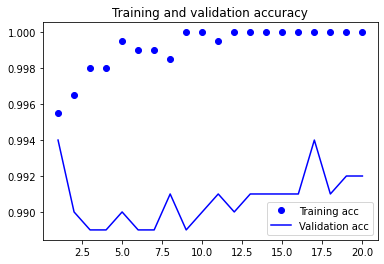

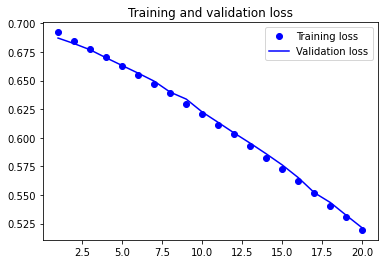

In [7]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

##FEATURE EXTRACTION WITH DATA AUGMENTATION

##Adding a densely connected classifier on top of the convolutional base

In [8]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


Setting conv_base parameters as non-trainable parameters

In [9]:
model.layers[0].trainable = False

In [10]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])

history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=20,
validation_data=validation_generator,
validation_steps=50)

Found 2048 images belonging to 2 classes.
Found 1025 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 558s 6s/step - loss: 0.5896 - acc: 0.6906 - val_loss: 0.3990 - val_acc: 0.8450
Epoch 2/20
100/100 [==============================] - 21s 213ms/step - loss: 0.4783 - acc: 0.7907 - val_loss: 0.3837 - val_acc: 0.8619
Epoch 3/20
100/100 [==============================] - 21s 206ms/step - loss: 0.4281 - acc: 0.8159 - val_loss: 0.2899 - val_acc: 0.8538
Epoch 4/20
100/100 [==============================] - 21s 210ms/step - loss: 0.3984 - acc: 0.8310 - val_loss: 0.2833 - val_acc: 0.8721
Epoch 5/20
100/100 [==============================] - 20s 198ms/step - loss: 0.3804 - acc: 0.8415 - val_loss: 0.2389 - val_acc: 0.8853
Epoch 6/20
100/100 [==============================] - 20s 199ms/step - loss: 0.3694 - acc: 0.8486 - val_loss: 0.2046 - val_acc: 0.8832
Epoch 7/20
100/100 [==============================] - 20s 197ms/step - loss: 0.3457 - acc: 0.8602 - val_loss

## Fine tunning

## Freezing all layers up to a specific one

In [11]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

## Fine tunning a model

In [13]:
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-5),
metrics=['acc'])

history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=20,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/20
100/100 [==============================] - 21s 207ms/step - loss: 0.1995 - acc: 0.9170 - val_loss: 0.0305 - val_acc: 0.9180
Epoch 2/20
100/100 [==============================] - 21s 206ms/step - loss: 0.1843 - acc: 0.9266 - val_loss: 0.1481 - val_acc: 0.9228
Epoch 3/20
100/100 [==============================] - 21s 208ms/step - loss: 0.1616 - acc: 0.9286 - val_loss: 0.1563 - val_acc: 0.9208
Epoch 4/20
100/100 [==============================] - 21s 208ms/step - loss: 0.1771 - acc: 0.9256 - val_loss: 0.1600 - val_acc: 0.9340
Epoch 5/20
100/100 [==============================] - 21s 209ms/step - loss: 0.1682 - acc: 0.9311 - val_loss: 0.1193 - val_acc: 0.9147
Epoch 6/20
100/100 [==============================] - 21s 210ms/step - loss: 0.1416 - acc: 0.9425 - val_loss: 0.2550 - val_acc: 0.9310
Epoch 7/20
100/100 [==============================] - 20s 204ms/step - loss: 0.1476 - acc: 0.9433 - val_loss: 0.0282 - val_acc: 0.9198
Epoch 8/20
100/100 [==============================] - 2

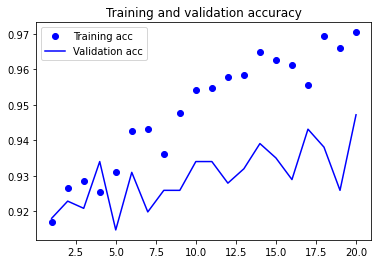

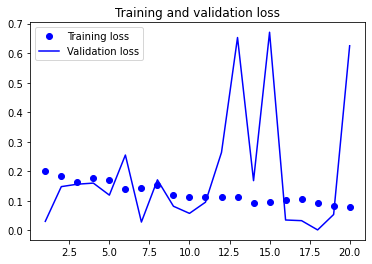

In [14]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

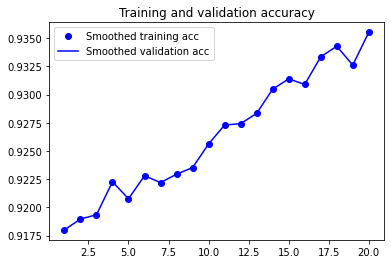

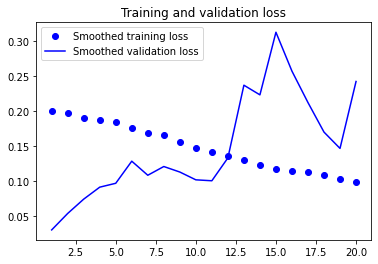

In [15]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
plt.plot(epochs,
smooth_curve(val_acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,
smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [16]:
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1039 images belonging to 2 classes.
test acc: 0.9380000233650208
